## Problem Statement

The goal is to predict the price of used vehicles on Craigslist so that we can determine what is a "fair" price. Since my knowledge of cars is very limited, I decided to work on this project so that I don't get scammed if I ever buy a used vehicle. While I could just use an existing website to find this information, I decided that doing this myself would be a little more fun.

## Imports and Setup

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import math

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
vehicles = pd.read_csv("~/data/vehicles.csv")

## Preliminary Exploration of the Data

### Profiling Report

In [3]:
pandas_profiling.ProfileReport(vehicles, minimal=True)

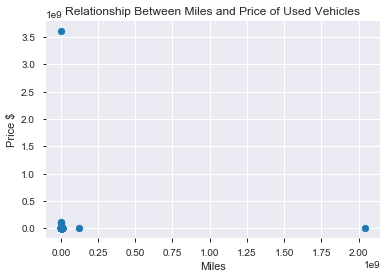

In [4]:
plt.scatter(vehicles["odometer"], vehicles["price"])
plt.xlabel("Miles")
plt.ylabel("Price $")
plt.title("Relationship Between Miles and Price of Used Vehicles")
plt.show()

Here we can see that there are some clear outliers in the data. Keep in mind that this is a plot of 458,213 observations. We will need to make sure to remove these outliers when we clean the data.
<br/><br/>

### Identifying Relationship Between Price and Categorical Variables

In [5]:
vehicles.groupby(["condition"]).mean().sort_values("odometer")

,Unnamed_0,id,price,year,odometer,lat,long
condition,,,,,,,
new,236275.478291,7.235561e+09,22727.584034,2014.114846,44238.791627,38.294442,-91.972235
like new,228800.162669,7.235485e+09,21183.728791,2012.110088,76759.467894,37.723715,-92.272118
good,227471.391304,7.235046e+09,48835.523975,2010.130881,93273.287002,38.077983,-90.333842
excellent,222231.237783,7.235314e+09,16242.504922,2010.288237,124823.197439,38.256727,-94.394465
fair,239303.144574,7.235487e+09,3675.619251,1999.070543,190659.897589,38.863069,-91.962966
salvage,221623.184569,7.235377e+09,3174.762481,2001.054463,197488.574597,38.002403,-96.217883


In [6]:
vehicles.groupby(["manufacturer"]).mean()

,Unnamed_0,id,price,year,odometer,lat,long
manufacturer,,,,,,,
acura,225655.130739,7.235929e+09,10760.026697,2010.152944,109339.662316,38.404227,-94.831049
alfa-romeo,218353.251337,7.235598e+09,22618.010695,2011.128342,30031.882022,38.534182,-91.399479
aston-martin,154385.257143,7.236985e+09,51870.485714,2008.971429,26990.454545,33.923422,-98.329910
audi,225473.037256,7.235785e+09,18897.334408,2012.913846,76809.792793,38.688574,-95.828830
bmw,223134.164913,7.235747e+09,16967.784569,2011.625729,78901.605077,37.767345,-96.481308
buick,233131.212182,7.234807e+09,9888.952405,2009.266267,103261.152354,39.309958,-91.116839
cadillac,231020.422067,7.235317e+09,36736.586534,2009.319887,87479.930240,37.973589,-92.050955
chevrolet,230423.606661,7.234947e+09,92983.919648,2009.939455,97600.285018,38.760353,-93.352264
chrysler,228059.785705,7.235041e+09,25191.748366,2010.565809,103099.388540,38.894013,-92.450237


Note that some manufactures like chevrolet, gmc, and jeep seem to have an exceptionally high average price. After we clean the data, we should check to see if these manufactures come down to a more reasonable price for their brand.
<br/><br/>

In [7]:
vehicles.groupby(["type"]).mean()

,Unnamed_0,id,price,year,odometer,lat,long
type,,,,,,,
SUV,231839.636038,7.235180e+09,13996.251020,2011.968764,101432.731290,39.290865,-96.313777
bus,239239.016736,7.235262e+09,16246.726639,2008.736402,112920.081377,38.215830,-89.519582
convertible,212276.632139,7.234582e+09,32656.021707,2002.899052,76385.680564,37.014063,-93.161310
coupe,222329.886894,7.235070e+09,25596.360149,2007.514274,71968.445826,37.484602,-93.016330
hatchback,222155.836710,7.235491e+09,11407.323590,2012.810207,76641.337170,38.134156,-94.833068
mini-van,236124.342807,7.235277e+09,8637.815743,2010.102826,125910.859643,39.196939,-92.755725
offroad,195827.047913,7.235384e+09,16612.506955,2000.574961,108647.118774,37.022980,-99.599614
other,224311.430712,7.235599e+09,21183.267508,2012.922111,69560.069536,37.486864,-91.116291
pickup,226880.505872,7.234784e+09,108624.270240,2012.406732,136880.335335,37.971212,-93.417682


In [8]:
vehicles.groupby(["fuel"]).mean().sort_values("odometer")

,Unnamed_0,id,price,year,odometer,lat,long
fuel,,,,,,,
electric,213755.749043,7.235781e+09,23964.013611,2015.627610,36250.291031,37.698044,-96.308906
other,218970.647533,7.235044e+09,19837.395256,2013.934470,73691.728317,37.751536,-94.706687
gas,229015.402693,7.235262e+09,33689.510467,2010.543109,95635.334157,38.571174,-94.117751
hybrid,222091.538515,7.235790e+09,13723.982902,2012.805013,95894.894737,38.321123,-99.410605
diesel,235420.613122,7.234883e+09,146437.321460,2010.678447,204513.668813,38.647646,-96.882746


In [9]:
vehicles.groupby(["drive"]).mean().sort_values("odometer")

,Unnamed_0,id,price,year,odometer,lat,long
drive,,,,,,,
rwd,219005.635720,7.235340e+09,23595.344776,2006.976363,91532.725351,36.790254,-93.888435
fwd,226518.165625,7.235334e+09,9719.478124,2012.053568,95242.440009,38.226216,-94.801588
4wd,239698.639474,7.235101e+09,48202.969411,2012.072749,113885.192287,40.324761,-95.910077


In [10]:
vehicles.groupby(["cylinders"]).mean().sort_values("odometer")

,Unnamed_0,id,price,year,odometer,lat,long
cylinders,,,,,,,
3 cylinders,235726.327273,7.235329e+09,10405.716364,2012.309524,58002.327968,37.559182,-98.018092
12 cylinders,179509.422460,7.235369e+09,56541.491979,2004.058824,71246.274390,36.072792,-96.355377
4 cylinders,228042.476273,7.235446e+09,9695.022561,2011.875259,96154.531564,38.819392,-95.954167
other,207891.253597,7.235596e+09,15726.920863,2009.339928,99545.436590,38.366547,-102.564591
10 cylinders,200153.473104,7.235360e+09,17058.471808,2009.099222,99785.993051,36.568197,-91.200622
6 cylinders,228396.515628,7.235228e+09,18590.206213,2010.599584,102191.087006,38.540976,-94.021868
5 cylinders,229645.496599,7.235317e+09,6629.097182,2007.769193,128530.458755,38.651547,-92.150753
8 cylinders,230590.751993,7.235069e+09,104303.217347,2008.441441,129169.785528,38.581306,-94.446443


In [11]:
vehicles.groupby(["transmission"]).mean().sort_values("odometer")

,Unnamed_0,id,price,year,odometer,lat,long
transmission,,,,,,,
other,220432.823650,7.234335e+09,23940.228049,2014.391805,40125.648261,37.341661,-89.565607
automatic,229635.551208,7.235294e+09,42333.363487,2011.078476,106142.623642,38.618222,-94.679638
manual,229817.652900,7.235477e+09,34393.781939,2001.452325,118670.780282,38.699739,-96.283253


In [12]:
vehicles.groupby(["size"]).mean().sort_values("odometer")

,Unnamed_0,id,price,year,odometer,lat,long
size,,,,,,,
sub-compact,220190.446905,7.235501e+09,12517.169790,2009.961953,86249.450409,37.381618,-95.933563
compact,223251.509966,7.235678e+09,8804.952669,2009.911982,100678.183235,37.470715,-95.507219
mid-size,229657.269733,7.235474e+09,13614.297951,2009.787923,108691.842644,38.143057,-92.966507
full-size,229046.379976,7.235419e+09,73786.378571,2008.670285,151543.095011,38.166412,-91.706641


## Data Cleaning and Post-Cleaning Inspection

### Cleaning

In [13]:
vehicles.columns

Index(['Unnamed_0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [14]:
cleaned_vehicles = vehicles.drop(['Unnamed_0', 'id', 'url', 'region', 'region_url',
                                  'title_status', 'VIN',  
                                  'paint_color', 'image_url', 'description', 'state',
                                  'lat', 'long', 'posting_date'], axis=1, )

cleaned_vehicles = cleaned_vehicles.dropna(subset=["price", "odometer", "manufacturer", "type"], how="any")

# remove listings for less than $1000
cleaned_vehicles = cleaned_vehicles[cleaned_vehicles["price"] >= 1000]

# remove the top 0.5 % listings by price and odometer
cleaned_vehicles = cleaned_vehicles[(cleaned_vehicles["price"] < np.percentile(cleaned_vehicles["price"], 99.5)) & 
                                    (cleaned_vehicles["odometer"] < np.percentile(cleaned_vehicles["odometer"], 99.5))]

In [15]:
cleaned_vehicles.shape

(283538, 12)

First I remove all the columns that I'm sure I won't be using in my analysis.

Since we plan to use "price", "odometer", "manufacturer", and "type" in our regression, we need to make sure that those columns actually have values. 

I noticed that sometimes Craigslist ads will advertise a very low price but put the actual price in the description of the item. As such, I decided to remove all listings advertised below \\$1000. This will remove some real listings, but the majority of the listings for that price aren't real so I believe it is better to remove them.

Lastly, we notice from above that we have some absurd outliers. I choose to remove listings on or above the 99.5 percentile in price and odometer since they have such a strong influence on the data. The downside is that the more expensive manufacturers might have a disproportionately large amount of real listings removed.
<br/><br/>

### Inspection

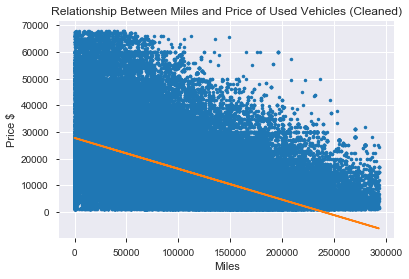

In [16]:
# polyfit gets best fit line
m, b = np.polyfit(cleaned_vehicles["odometer"], cleaned_vehicles["price"], 1)

plt.plot(cleaned_vehicles["odometer"], cleaned_vehicles["price"], ".")
plt.plot(cleaned_vehicles["odometer"], b + m * cleaned_vehicles["odometer"], "-")
plt.xlabel("Miles")
plt.ylabel("Price $")
plt.title("Relationship Between Miles and Price of Used Vehicles (Cleaned)")
plt.show()


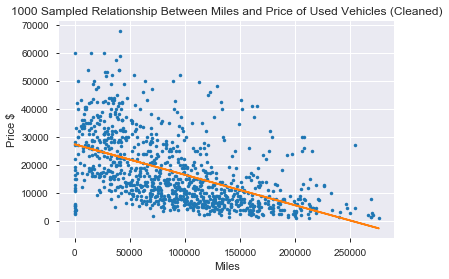

In [17]:
# get a random sample of 1000 observations
temp = cleaned_vehicles.sample(1000, random_state=0)

# polyfit gets best fit line
m, b = np.polyfit(temp["odometer"], temp["price"], 1)

plt.plot(temp["odometer"], temp["price"], ".")
plt.plot(temp["odometer"], b + m * temp["odometer"], "-")
plt.xlabel("Miles")
plt.ylabel("Price $")
plt.title("1000 Sampled Relationship Between Miles and Price of Used Vehicles (Cleaned)")
plt.show()

Here we can get a better idea of how the bulk of the data is distributed rather than looking at the scatter plot of all the values in the cleaned data.
<br/><br/>

In [18]:
cleaned_vehicles.groupby(["condition"]).mean().sort_values("odometer")

,price,year,odometer
condition,,,
new,23128.920761,2013.481775,55862.507132
like new,17242.418545,2012.459562,77821.307598
good,18130.375787,2011.478244,81779.593413
excellent,14036.229739,2010.625342,103200.780178
salvage,4514.826715,2004.516245,129527.144404
fair,3523.271429,2001.076847,163752.726355


Interestingly, 'excellent' is worse than 'good' and 'fair' is worse than 'salvage' in terms of average year and miles.

In [19]:
cleaned_vehicles.groupby(["manufacturer"]).mean()

,price,year,odometer
manufacturer,,,
acura,12756.282309,2010.349348,107483.863687
alfa-romeo,25378.353535,2009.292929,35413.141414
aston-martin,41664.857143,2007.333333,29744.619048
audi,21032.861118,2013.249939,74073.597266
bmw,19242.748494,2012.014563,76437.647651
buick,12028.486226,2010.230900,87711.570293
cadillac,18866.864362,2010.398271,82109.142509
chevrolet,18945.339187,2011.165618,91368.758881
chrysler,9767.041667,2010.843137,102390.642157


Here we can see that the unexpectedly high average prices for some brands have dissapated after cleaning.
<br/><br/>

In [20]:
cleaned_vehicles.groupby(["type"]).mean()

,price,year,odometer
type,,,
SUV,15561.915851,2011.950996,101251.864866
bus,18320.220963,2007.980170,94848.606232
convertible,17599.697674,2005.218791,72338.009302
coupe,20054.422015,2008.652003,67540.815184
hatchback,11814.284853,2013.013119,74811.510920
mini-van,9307.051239,2010.234023,122916.497112
offroad,17528.586580,2002.673160,102888.261905
other,23511.310795,2013.310597,66597.756524
pickup,26695.889861,2012.935436,83860.179078


## Multiple Linear Regression

### Training the Model

In [21]:
# drop extra columns I decided I don't need
cleaned_vehicles_dummy = cleaned_vehicles.drop(['condition', 'model', 'year'], axis=1, )

# convert categorical variables into dummy variables
cleaned_vehicles_dummy = pd.get_dummies(cleaned_vehicles_dummy,  
                                        columns = ["type", "manufacturer", 
                                                    "cylinders", 
                                                    "fuel",  "transmission", 
                                                    "drive", "size"])

While condition, model, and year could all be used to predict pricing, they each have some problems.
Condition and year suffer from multicollinearity with odometer. Additionally, since condition of a vehicle is up to each individual's opinion/word, I was worried about reliability. While model would be a useful addition for predicting price it has a cardinality of roughly 30,000 which is far too many to convert into dummy variables.

In [22]:
cleaned_vehicles_dummy.head(10)

,price,odometer,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,...,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact
0,35990,32742.0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,7500,93600.0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,4900,87046.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2000,190000.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,19500,116000.0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5,29590,33290.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,39990,9692.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7,41990,2778.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8,31990,29614.0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
10,27500,189000.0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [23]:
# get data frame of features
features = cleaned_vehicles_dummy.drop(["price"], axis = 1)

# get array of values we're trying to predict 
labels = np.array(cleaned_vehicles_dummy["price"])

# split the data into train and test data sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.20, random_state = 0)

In [24]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (226830, 78)
Training Labels Shape: (226830,)
Testing Features Shape: (56708, 78)
Testing Labels Shape: (56708,)


In [25]:
mlr = LinearRegression()

# this actually creates the model
mlr.fit(train_features, train_labels)

print("Multiple linear regression intercept:", mlr.intercept_)
print("Multiple linear regression coefficients:\n", mlr.coef_)

Multiple linear regression intercept: 29585.15920156274
Multiple linear regression coefficients:
 [-1.15975076e-01 -9.75704103e+02 -9.46547023e+02 -1.19366253e+03
  1.16725153e+03 -3.63787303e+03 -6.78135673e+02  4.00529717e+02
  2.29013182e+03  4.10300293e+03 -2.58789810e+03  4.03347931e+03
  8.06310259e+02 -2.78088511e+03 -5.39399721e+02  3.30429362e+03
  1.82127787e+04  2.11700446e+03  7.46989865e+02 -3.18013358e+03
  8.04613902e+02 -1.24914043e+03 -3.33016893e+03 -8.45100809e+02
 -1.84779761e+03  1.58339574e+04 -6.63031148e+03 -1.78488779e+03
  6.24044788e+02 -1.18878094e+04 -1.12550781e+03 -3.76186535e+03
 -9.00449919e+02  1.49504134e+03 -1.08576974e+03 -3.01219031e+03
 -4.36317800e+03  2.02603667e+03 -2.01182599e+03 -3.27983027e+03
  1.22156699e+03 -6.81544869e+03 -2.52525097e+03 -4.51982233e+03
 -3.65185623e+03 -3.63546874e+03  1.05254602e+04 -2.41097956e+02
  5.24437546e+03 -4.94464299e+03 -1.81351595e+03  2.08877192e+04
  5.77912528e+02 -4.33924676e+03 -3.00077357e+02  2.55437

In [26]:
# creates dictionary where the features are keys and corresponding coefficients are values
coef = dict(zip(train_features.columns, mlr.coef_))

In [27]:
coef['manufacturer_mercedes-benz']

1221.566986229604

### Visualization of Results

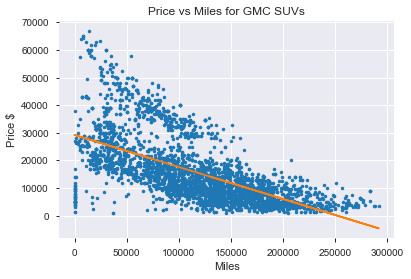

In [28]:
temp = cleaned_vehicles[(cleaned_vehicles["manufacturer"] == "gmc") &
                        (cleaned_vehicles["type"] == "SUV")]
m, b = coef['odometer'], mlr.intercept_ + coef['type_SUV'] + coef['manufacturer_gmc']
plt.plot(temp["odometer"], temp["price"], ".")
plt.plot(temp["odometer"], b + m * temp["odometer"], "-")
plt.xlabel("Miles")
plt.ylabel("Price $")
plt.title("Price vs Miles for GMC SUVs")
plt.show()

The pattern in the scatter plot for GMC SUVs might be indicative of two different types of GMC SUV.
<br/><br/>

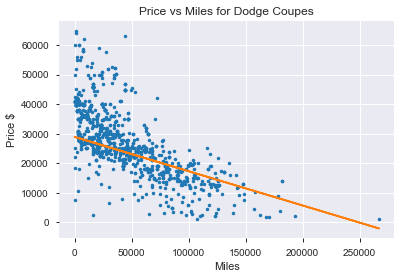

In [29]:
temp = cleaned_vehicles[(cleaned_vehicles["manufacturer"] == "dodge") &
                        (cleaned_vehicles["type"] == "coupe")]
m, b = coef['odometer'], mlr.intercept_ + coef['type_coupe'] + coef['manufacturer_dodge']
plt.plot(temp["odometer"], temp["price"], ".")
plt.plot(temp["odometer"], b + m * temp["odometer"], "-")
plt.xlabel("Miles")
plt.ylabel("Price $")
plt.title("Price vs Miles for Dodge Coupes")
plt.show()

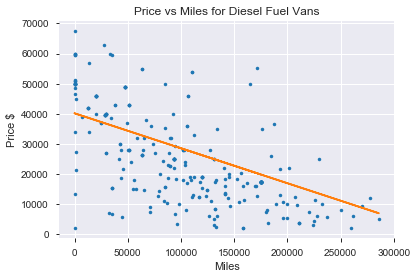

In [30]:
temp = cleaned_vehicles[(cleaned_vehicles["fuel"] == "diesel") &
                        (cleaned_vehicles["type"] == "van")]
m, b = coef['odometer'], mlr.intercept_ + coef['type_van'] + coef['fuel_diesel']
plt.plot(temp["odometer"], temp["price"], ".")
plt.plot(temp["odometer"], b + m * temp["odometer"], "-")
plt.xlabel("Miles")
plt.ylabel("Price $")
plt.title("Price vs Miles for Diesel Fuel Vans")
plt.show()

### Accuracy Assessment

In [31]:
# array of predicted prices for the test set using our model
predictions = mlr.predict(test_features)

# recall that test_labels are the actual listed prices for the test features
errors = abs(predictions - test_labels) 
print('Mean Absolute Error:', np.mean(errors), "dollars.")

mape = np.mean(100 * (errors / test_labels))
print('Mean Absolute % Error:', mape, '%.')
accuracy = 100 - mape
print('Accuracy:', accuracy, '%.')

Mean Absolute Error: 5400.495510729794 dollars.
Mean Absolute % Error: 57.98938542137455 %.
Accuracy: 42.01061457862545 %.


After some fiddling, the best I could seem to do with a pure linear regression was an accuracy of roughly 42 %.
<br/><br/>

In [32]:
# For all predictions < $1000, set the predicted value to $1000 since $1000 is the lower bound 
predictions[predictions < 1000] = 1000

# recall that test_labels are the actual listed prices for the test features
errors = abs(predictions - test_labels) 
print('Mean Absolute Error:', np.mean(errors), "dollars.")

mape = np.mean(100 * (errors / test_labels))
print('Mean Absolute % Error:', mape, '%.')
accuracy = 100 - mape
print('Accuracy:', accuracy, '%.')

Mean Absolute Error: 5257.413601750979 dollars.
Mean Absolute % Error: 52.711567117550864 %.
Accuracy: 47.288432882449136 %.


Since the regression predicts negative values for the price for listings with a large number of miles, I can set any predicted values less than \\$1000 to \\$1000 for a considerable increase in accuracy upto 47%. Since the assumption is that most vehicle listings on Craigslist below \\$1000 are fake, we know that it's not worth predicting values that low. Even with the increase in accuracy, I'm still not satisfied with the performance, so I will look into alternate methods to see if I can do any better.
<br/><br/>

## Random Forest Regression

### Cleaning for Random Forest

In [33]:
cleaned_vehicles_RFR = vehicles.drop(['Unnamed_0', 'id', 'url', 'region', 'region_url',
                                    'title_status', 'VIN', 'paint_color',
                                    'image_url', 'description', 'state',
                                    'lat', 'long', 'posting_date', 'model'], axis=1, )

cleaned_vehicles_RFR = cleaned_vehicles_RFR.dropna(subset=["price", "odometer"], how="any")

# remove listings for less than $1000
cleaned_vehicles_RFR = cleaned_vehicles_RFR[cleaned_vehicles_RFR["price"] >= 1000]

# remove the top 0.5 % listings by price and odometer
cleaned_vehicles_RFR = cleaned_vehicles_RFR[(cleaned_vehicles_RFR["price"] < np.percentile(cleaned_vehicles_RFR["price"], 99.5)) & 
                                    (cleaned_vehicles_RFR["odometer"] < np.percentile(cleaned_vehicles_RFR["odometer"], 99.5))]

In [34]:
cleaned_vehicles_RFR.head(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type
0,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,NaN,other
1,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,NaN,sedan
2,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,automatic,NaN,NaN,SUV
3,2000,1974.0,chevrolet,good,4 cylinders,gas,190000.0,automatic,rwd,full-size,pickup
4,19500,2005.0,ford,excellent,8 cylinders,diesel,116000.0,automatic,4wd,full-size,pickup
5,29590,2016.0,toyota,good,6 cylinders,gas,33290.0,other,NaN,NaN,pickup
6,39990,2012.0,ford,good,8 cylinders,gas,9692.0,other,rwd,NaN,coupe
7,41990,2012.0,chevrolet,good,8 cylinders,gas,2778.0,other,rwd,NaN,coupe
8,31990,2017.0,jeep,good,6 cylinders,gas,29614.0,other,4wd,NaN,other
10,27500,2012.0,ford,excellent,NaN,diesel,189000.0,automatic,4wd,NaN,pickup


### Training the Model

In [35]:
# creates dummy variables out of categorical variables
cleaned_vehicles_dummy_RFR = pd.get_dummies(cleaned_vehicles_RFR, columns = 
                                            ['manufacturer', 'fuel', 'type', 'year', 
                                            'transmission', 'drive', 'size', 'condition', 
                                            'cylinders'])

In [36]:
cleaned_vehicles_dummy_RFR.head(10)

,price,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other
0,35990,32742.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,7500,93600.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4900,87046.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2000,190000.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,19500,116000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,29590,33290.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,39990,9692.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,41990,2778.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,31990,29614.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,27500,189000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# data frame of features
features_RFR = cleaned_vehicles_dummy_RFR.drop(["price"], axis = 1)

# array of price
labels_RFR = np.array(cleaned_vehicles_dummy_RFR["price"])

# splits data into test and training sets
train_features_RFR, test_features_RFR, train_labels_RFR, test_labels_RFR = train_test_split(
    features_RFR, labels_RFR, test_size = 0.20, random_state = 0)

In [38]:
print('Training Features Shape:', train_features_RFR.shape)
print('Training Labels Shape:', train_labels_RFR.shape)
print('Testing Features Shape:', test_features_RFR.shape)
print('Testing Labels Shape:', test_labels_RFR.shape)

Training Features Shape: (288460, 185)
Training Labels Shape: (288460,)
Testing Features Shape: (72115, 185)
Testing Labels Shape: (72115,)


In [39]:
# I choose to use 15 estimators for the sake of running time
rfr = RandomForestRegressor(n_estimators = 15, random_state = 0)

# trains the model
rfr.fit(train_features_RFR, train_labels_RFR)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

### Accuracy Assessment

In [40]:
# predictions from the testing set
predictions_RFR = rfr.predict(test_features_RFR)

# array of absolute errors
errors_RFR = abs(predictions_RFR - test_labels_RFR)
print('Mean Absolute Error:', np.mean(errors_RFR), "dollars")

# mean absolute error
mape_RFR = np.mean(100 * (errors_RFR / test_labels_RFR))
print('Mean Absolute % Error:', mape_RFR, '%.')
accuracy_RFR = 100 - mape_RFR
print('Accuracy:', accuracy_RFR, '%.')

Mean Absolute Error: 1952.004320352026 dollars
Mean Absolute % Error: 21.713692927332872 %.
Accuracy: 78.28630707266713 %.


After some experimentation, 78.28% accuracy seems to be the best I can come up with using random forest while keeping execution time to a reasonable amount. This seems satisfactory to me.
<br/><br/>

## Final Remarks

One thing I want to mention with regards to the data set is that the data was scraped every few months. This means that listings can go up and be deleted in between scrapings. This naturally will result in less "good" deals appearing in the data set since those vehicles are more likely to be purchased in a shorter period of time compared to normal listings. This would result in our data being skewed towards higher priced vehicles compared to the real set of all vehicle listings ever posted on Craigslist. This is important to keep in mind when interpreting the results.
<br/><br/>
Another thing worthy of mentioning is that the price of a used vehicle doesn't have some single "right" answer. Since different people will list similar quality vehicles for different prices somewhat arbitrarily (as far as the algorithm is concerned), we wouldn't expect to get a super high accuracy. Some people are looking to get the most out of their vehicle, others are desperate and need the cash asap. That said, I would argue that the 78% accuracy achieved by random forest is sufficient accuracy for this problem.